In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from PIL import Image

In [3]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

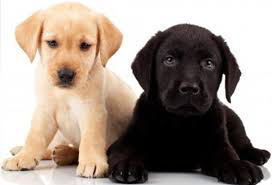

In [4]:
# Convert PIL image to array
img = Image.open('Datasets/dogs.jpeg')
img

In [5]:
img_array = np.array(img)
img_array.shape

(185, 272, 3)

In [6]:
print('Dimensions')
print("Height : " + str(img.height))
print("Width : " + str(img.width))

Dimensions
Height : 185
Width : 272


In [7]:
flat_img_array = img_array.ravel()
new_array = flat_img_array.reshape(img_array.shape[0] * img_array.shape[1], img_array.shape[2])
new_array.shape

(50320, 3)

In [8]:
# Initializing the k means
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_array)

KMeans(n_clusters=3)

In [9]:
print("\nCluster centroids")
print(kmeans.cluster_centers_)


Cluster centroids
[[210.44206186 174.568      143.41468041]
 [ 29.49800383  21.57183484  20.46825267]
 [251.43324962 247.54856856 242.94274234]]


In [10]:
# count elements of each cluster
print("Elements of Each cluster ")
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

Elements of Each cluster 
{0: 12188, 1: 18287, 2: 19845}


In [11]:
df = pd.DataFrame(new_array, columns=["col1", "col2", "col3"])
df["cluster"] = kmeans.labels_
print(df.head())

   col1  col2  col3  cluster
0   240   240   240        2
1   255   255   255        2
2   255   255   255        2
3   251   251   251        2
4   255   255   255        2


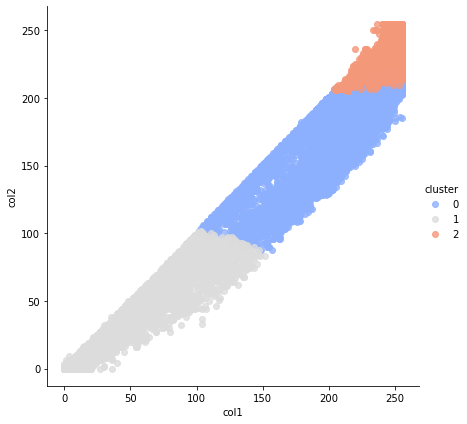

In [12]:
# Plot cluster points
sns.lmplot('col1', 'col2', data=df, hue="cluster",
           palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [13]:
X_compressed = kmeans.cluster_centers_[kmeans.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)
X_compressed = X_compressed.reshape(img_array.shape[0], img_array.shape[1], img_array.shape[2])

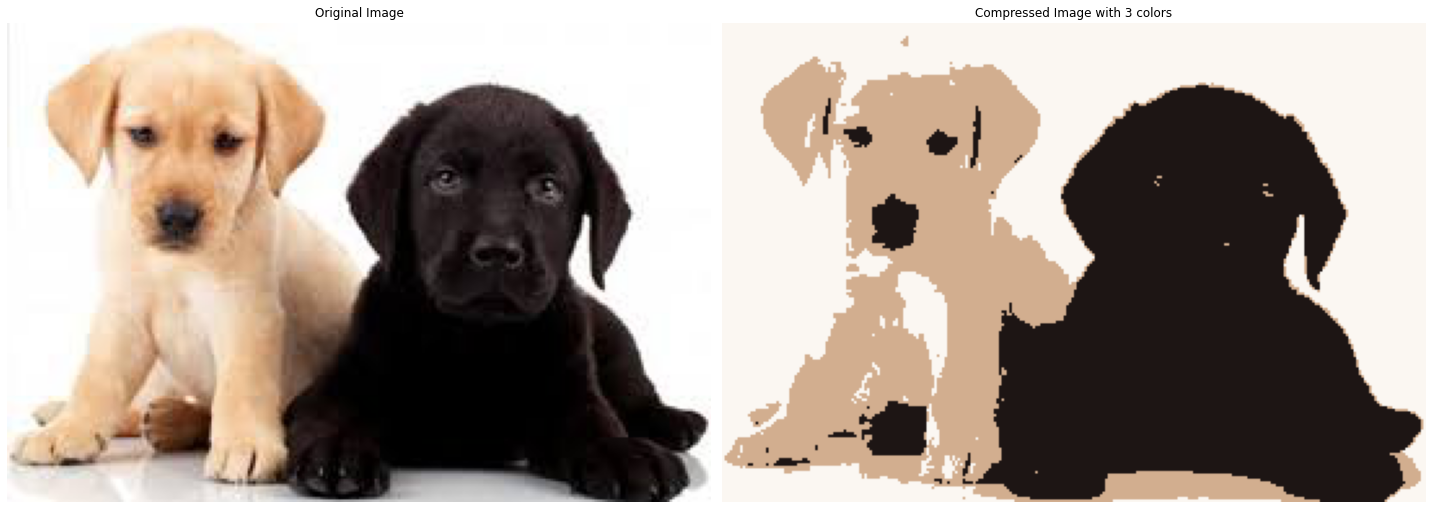

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 3 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

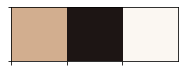

In [15]:
# Find Dominant color 
centroid_colors = kmeans.cluster_centers_.astype(int)
colours = [rgb_to_hex(color) for color in centroid_colors]

sns.palplot(colours)
plt.show()